# ML
<font size = "2.5">
A dataframe detailing all metrics for each of the 5 classifiers is depicted at the end of this notebook
</font>

In [1]:
import pandas as pd
import numpy as np
matrix_df = pd.read_csv("../pre-process+plotting/coffeeProcessed.csv")
matrix_df

,rating,reviews,price,coffee_type
0,3.8,5,12.98,light roast
1,4.6,64,4.94,light roast
2,4.7,740,14.92,light roast
3,4.7,336,9.96,light roast
4,4.5,1924,26.72,light roast
...,...,...,...,...
818,4.7,98,10.64,dark roast
819,0.0,0,15.11,dark roast
820,0.0,0,12.30,dark roast
821,0.0,0,10.99,dark roast


### Encode labels
<font size = "2.5">
Encoding strign type labels to numerical for easier classification. First, target labels are fit to the preprocessing.LabelEncoder class.<br>
The reason for the "dark" type to be assigned label "0" and "ligh" type label "1" is that sklearn preprocessor assigns labels alhabetically.
</font>

In [2]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
labels = le.fit_transform(matrix_df["coffee_type"])
print(" - light roast: ", labels[0])
print(" - medium roast: ", labels[200])
print(" - dark roast: ", labels[-1])

 - light roast:  1
 - medium roast:  2
 - dark roast:  0


### Split dataset into train & test

In [3]:
matrix_b = matrix_df.copy()
from sklearn.model_selection import train_test_split

features = list(matrix_b.columns)[:-1]

#splitting features and lables
X = matrix_b[features]
y = labels

X_np = np.around(np.array(X), 2)
y_np = np.array(labels)

#Creating train/test splits
X_train, X_test, y_train, y_test = train_test_split(X_np, y_np, test_size=0.2, random_state=42)
len(X_train), len(X_test), len(y_train), len(y_test)

(658, 165, 658, 165)

### Import classifier functions & define score parser
<font size = "2.5">
The score parser function is defined as getScores and takes a dictionary as input and outputs a list of metrics.
</font>

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_validate
import warnings
warnings.filterwarnings('ignore') 

#Score parser function to get metrics from resulting dictionary and round them to 2 
def getScores(dict):
  scores = ['test_accuracy', 'test_f1_macro', 'test_precision_macro', 'test_recall_macro']
  temp_ls= []
  for score in scores:
    temp = 0
    temp = round(dict[score].mean(), 2)
    temp_ls.append(temp)
  return temp_ls

In [5]:
clf_LoReg = LogisticRegression(random_state=33).fit(X,y)
LR_cv = cross_validate(clf_LoReg, X_np, y_np, cv=10, scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'])
lr = getScores(LR_cv)
print("LogisticRegression classifier metrics for accuracy, precision, recall, and F1-score respectively are: ")
for _ in lr:
    print(" - ", _)

LogisticRegression classifier metrics for accuracy, precision, recall, and F1-score respectively are: 
 -  0.61
 -  0.27
 -  0.24
 -  0.34


In [6]:
## Random Forest
rf_clf = RandomForestClassifier(n_estimators=100)
rf_cv_macro = cross_validate(rf_clf, X_np, y_np, cv=10,scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'])
rf = getScores(rf_cv_macro)
print("RandomForest classifier metrics for accuracy, precision, recall, and F1-score respectively are: ")
for _ in rf:
    print(" - ", _)

RandomForest classifier metrics for accuracy, precision, recall, and F1-score respectively are: 
 -  0.71
 -  0.54
 -  0.61
 -  0.52


In [7]:
## SVM
svm_clf = svm.SVC(kernel='sigmoid', C=1, random_state=42)
svm_cv = cross_validate(svm_clf, X_np, y_np, cv=10, scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'])
sv = getScores(svm_cv)
print("SVM classifier metrics for accuracy, precision, recall, and F1-score respectively are: ")
for _ in sv:
    print(" - ", _)

SVM classifier metrics for accuracy, precision, recall, and F1-score respectively are: 
 -  0.46
 -  0.29
 -  0.29
 -  0.3


In [8]:
## G-Boosted
gb_cv = cross_validate((GradientBoostingClassifier(
                        n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)),X_np, y_np, cv=10,
                        scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'])
gb = getScores(gb_cv)
print("GradientBoostingTree classifier metrics for accuracy, precision, recall, and F1-score respectively are: ")
for _ in gb:
    print(" - ", _)

GradientBoostingTree classifier metrics for accuracy, precision, recall, and F1-score respectively are: 
 -  0.69
 -  0.48
 -  0.53
 -  0.48


### Import decision tree classifier
<font size = "2.5">
This part deals with training a decision tree classifier on data and depicting the actual tree.<br>
After depiction, a function is used to calculate and print out the mean accuracy of this classifier.
</font>

#### Train

In [13]:
from sklearn import tree
clf_tree = tree.DecisionTreeClassifier(max_depth=5)
clf_tree = clf_tree.fit(X_np, y_np)

#### Depict

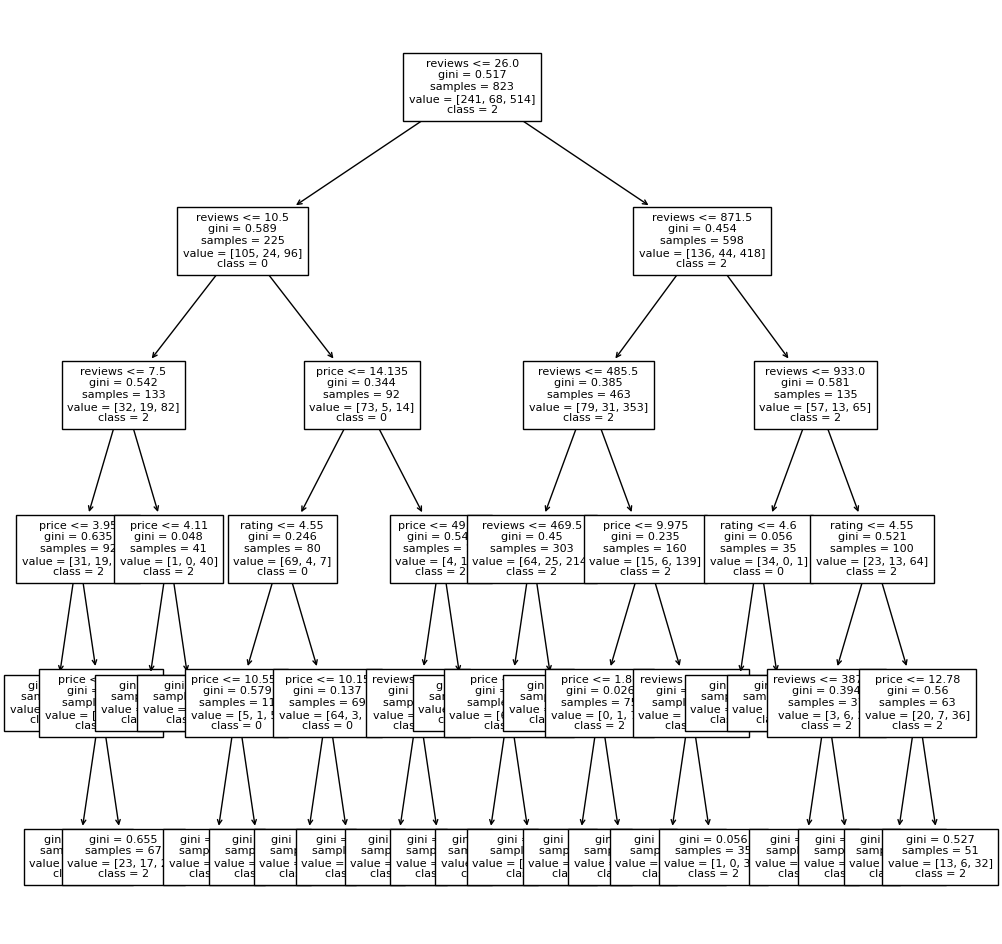

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
tree.plot_tree(clf_tree,
            class_names=np.unique(y_np).astype("str"),
            feature_names = features,
            fontsize=8)
plt.show()

#### Report mean accuracy

In [21]:
dtree_score = clf_tree.score(X_np, y_np)
print("The mean accuracy for the above depicted decision tree is ", round(dtree_score, 2))

The mean accuracy for the above depicted decision tree is  0.76


### Create dataframe to report metrics for all classifiers

In [20]:
metrics_df = pd.DataFrame({
    "LogisticRegression": lr,
    "Random-forest": rf,
    "SVM": sv,
    "GradientBT": gb,
    "Decision-tree": [round(dtree_score, 2), 0, 0, 0]},
    index = ["Accuracy", "Precision", "Recall", "F1-accuracy"]
)
metrics_df

,LogisticRegression,Random-forest,SVM,GradientBT,Decision-tree
Accuracy,0.61,0.71,0.46,0.69,0.76
Precision,0.27,0.54,0.29,0.48,0.00
Recall,0.24,0.61,0.29,0.53,0.00
F1-accuracy,0.34,0.52,0.30,0.48,0.00
